In [309]:
import torch
import seaborn as sns

WD = "/home/team_crypto/2022_crypto_ml/03_wdata/"

# Read Data

In [284]:
df = pd.read_parquet(f'{WD}1204_cypto_factor_processed.pq')
df.shape
df.head(3)

(240380, 58)

,id,year,week,time,symbol,name,day,prices,ret_w,ln_ret_w,size_mcap_w,size_prc_w,size_maxdprc_w,size_age_w,mom_1_0_w,mom_2_0_w,mom_3_0_w,mom_4_0_w,mom_4_1_w,mom_8_0_w,mom_16_0_w,mom_50_0_w,mom_100_0_w,volume_vol_w,volume_prcvol_w,volume_volscaled_w,vol_retvol_w,vol_maxret_w,vol_stdprcvol_w,vol_damihud_w,vol_beta_w,vol_idiovol_w,vol_delay_w,vol_beta2_w,size_mcap_r,size_prc_r,size_maxdprc_r,size_age_r,mom_1_0_r,mom_2_0_r,mom_3_0_r,mom_4_0_r,mom_4_1_r,mom_8_0_r,mom_16_0_r,mom_50_0_r,mom_100_0_r,volume_vol_r,volume_prcvol_r,volume_volscaled_r,vol_retvol_r,vol_maxret_r,vol_stdprcvol_r,vol_damihud_r,vol_beta_r,vol_idiovol_r,vol_delay_r,vol_beta2_r
0,0chain,2018,29,2018-07-20,zcn,0chain,5,0.432846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0chain,2018,30,2018-07-27,zcn,0chain,5,0.350071,-0.191233,-0.212245,16.667016,0.359663,0.483325,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.062020,11.268533,0.004513,NaN,-0.002512,9.888558,1.333573e-06,NaN,NaN,NaN,NaN,0.544936,0.716120,0.720399,0.006374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.245364,0.380884,0.312411,NaN,0.001429,0.314574,0.784286,NaN,NaN,NaN,NaN
2,0chain,2018,31,2018-08-03,zcn,0chain,5,0.247689,-0.292462,-0.345964,16.454771,0.300157,0.391944,14.0,-0.191233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.359969,11.369049,0.006165,0.050272,0.046434,10.729878,3.320848e-07,NaN,NaN,NaN,NaN,0.515021,0.699571,0.702432,0.014104,0.167147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256080,0.370529,0.324750,0.308802,0.232092,0.408369,0.702006,NaN,NaN,NaN,NaN


In [285]:
df['ln_ret_w'] = df.groupby(['id'])['ln_ret_w'].shift(-1)

<AxesSubplot:>

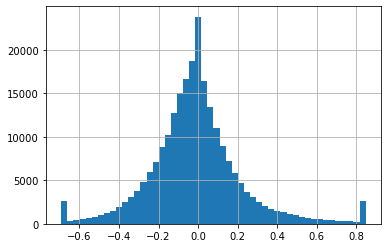

In [286]:
df['ln_ret_w'].hist(bins=50)

In [287]:
y_idx = df.columns.get_loc("ln_ret_w")
x_idx1 = df.columns.get_loc("size_mcap_r")
x_idx2 = df.columns.get_loc("vol_beta2_r")
idx = [y_idx] + list(range(x_idx1, x_idx2 + 1))

df = df.iloc[:, idx].dropna()
df.shape

(61599, 25)

In [288]:
df.head()

,ln_ret_w,size_mcap_r,size_prc_r,size_maxdprc_r,size_age_r,mom_1_0_r,mom_2_0_r,mom_3_0_r,mom_4_0_r,mom_4_1_r,mom_8_0_r,mom_16_0_r,mom_50_0_r,mom_100_0_r,volume_vol_r,volume_prcvol_r,volume_volscaled_r,vol_retvol_r,vol_maxret_r,vol_stdprcvol_r,vol_damihud_r,vol_beta_r,vol_idiovol_r,vol_delay_r,vol_beta2_r
101,-0.028756,0.395137,0.638298,0.661094,0.458771,0.032508,0.309859,0.233909,0.627943,0.907378,0.564309,0.773333,0.815891,0.546703,0.211246,0.261398,0.281155,0.445652,0.004559,0.180556,0.828006,0.931438,0.961538,0.643813,0.931438
102,0.174598,0.446269,0.656716,0.646269,0.457037,0.903323,0.294479,0.792570,0.717391,0.229814,0.875197,0.888158,0.914122,0.670213,0.228358,0.268657,0.262687,0.884323,0.886567,0.199391,0.781764,0.924342,0.960526,0.717105,0.924342
103,-0.159822,0.428571,0.650957,0.656848,0.464338,0.193165,0.793103,0.163110,0.670769,0.798462,0.812893,0.655738,0.939279,0.725594,0.209131,0.243004,0.248895,0.917541,0.873343,0.262369,0.699115,0.933657,0.964401,0.805825,0.933657
104,0.459391,0.474138,0.669540,0.663793,0.478873,0.857765,0.709677,0.857778,0.532331,0.165414,0.807044,0.836013,0.888060,0.776042,0.214080,0.272989,0.251437,0.887740,0.846264,0.257016,0.795683,0.929712,0.963259,0.777955,0.929712
105,0.019576,0.416327,0.632653,0.655782,0.496000,0.041609,0.329132,0.176803,0.612857,0.858571,0.629412,0.905719,0.735507,0.793893,0.210884,0.266667,0.254422,0.836389,0.706122,0.172073,0.709809,0.913043,0.950311,0.687888,0.913043


In [289]:
y = np.array(df.loc[:, 'ln_ret_w'].values)
y.shape
X = np.array(df.loc[:, "size_mcap_r":"vol_beta2_r"].values)
X.shape

(61599,)

(61599, 24)

# Build Model

## Loss Function

In [290]:
def mse_loss(y, y_pred):
    return torch.mean((y - y_pred) ** 2)


def huber_loss(y, y_pred, sigma=0.1):
    r = (y - y_pred).abs()
    loss = (r[r <= sigma]).pow(2).mean()
    loss += (r[r > sigma]).mean() * sigma - sigma**2/2
    return loss

def l1_penalty(lamb, b):
    return lamb * torch.sum(torch.abs(b))

def l2_penalty(lamb, b):
    return lamb * torch.sum(b ** 2)

def enet_penalty(lamb, b, alpha):
    return lamb * (alpha * torch.sum(b ** 2) + (1 - alpha) * torch.sum(torch.abs(b)))

## Optimizer

In [291]:
from torch.optim.optimizer import required

In [292]:
class PGM(torch.optim.SGD):
    def __init__(self, params, proxs, lr=required, momentum=0, dampening=0,
                 nesterov=False):
        kwargs = dict(lr=lr, momentum=momentum, dampening=dampening, weight_decay=0, nesterov=nesterov)
        super().__init__(params, **kwargs)

        if len(proxs) != len(self.param_groups):
            raise ValueError("Invalid length of argument proxs: {} instead of {}".format(len(proxs), len(self.param_groups)))

        for group, prox in zip(self.param_groups, list(proxs)):
            group.setdefault('prox', prox)

    def step(self, closure=None):
        # this performs a gradient step
        # optionally with momentum or nesterov acceleration
        super().step(closure=closure)

        for group in self.param_groups:
            prox = group['prox']

            # here we apply the proximal operator to each parameter in a group
            for p in group['params']:
                p.data = prox(p.data)

## Linear Model

In [301]:
class LinearRegression(torch.nn.Module):
    
    def __init__(self, lamb=0.1, lr=1e-3, penalty=None, n_iter=100, fit_intercept=True, alpha=0.5):
        super().__init__()
        self.lamb = lamb  # Tuning parameter
        self.lr = lr  # Learning rate
        self.history = []
        self.penalty = penalty 
        self.n_iter = n_iter
        self.fit_intercept = fit_intercept
        self.alpha = alpha  # ElasticNet
        return
    
    def add_intercept(self,x):
        a = torch.ones(x.size()[0],1)
        return torch.cat((x,a),axis=1)
    
    def forward(self, x):
        """"Linear regression function"""  
        return x @ self.b.t() + self.const  # matrix multiply inputs (x) with the transposed weights (w) and add the intercept (b)
    
    def loss(self, y, y_pred, loss_func='mse', sigma=0.1):
        """"Calculate loss"""  
        rss = huber_loss(y, y_pred, sigma=sigma) if loss_func == 'huber' else mse_loss(y, y_pred)
        
        penalty = 0 
        if self.penalty == 'l1': penalty = l1_penalty(self.lamb, self.b)
        if self.penalty == 'l2': penalty = l2_penalty(self.lamb, self.b)
        if self.penalty == 'enet': penalty = enet_penalty(self.lamb, self.b, self.alpha)
        
        return rss + penalty 
    
        
    def fit(self, x, y, loss_func='mse', sigma=0.1):
        """"Fit model"""  
        x = torch.FloatTensor(x)
        y = torch.FloatTensor(y)
        
        if self.fit_intercept:
            x = self.add_intercept(x)

        self.b = torch.nn.Parameter(torch.zeros(x.shape[1]))
        self.const = torch.nn.Parameter(torch.zeros(1))
        
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)  # Adam optimizer
        # optimizer = torch.optim.Adagrad(self.parameters(), lr=self.lr)  # Adagrad optimizer
        # optimizer = PGM(self.parameters(), proxs=, lr=self.lr)  # Proximal Gradient Method (What is the proxs?)
        
        for _ in range(self.n_iter):
            x_ = torch.FloatTensor(x)
            y_ = torch.FloatTensor(y)

            y_pred = self.forward(x_)
            optimizer.zero_grad()
            loss = self.loss(y_, y_pred, loss_func=loss_func, sigma=sigma)
            loss.backward()
            optimizer.step()
            
            self.history.append(loss.item())
            
        return self.b.detach().numpy(), self.const.detach().numpy()
    
    
    def predict(self, x):
        """"Predict"""  
        x = torch.FloatTensor(x)
        
        if self.fit_intercept:
            x = self.add_intercept(x)
        
        return self.forward(x).detach().numpy()
    
    
    def plot_history(self):
        """"Plot loss function over time"""  
        return sns.lineplot(x=[i + 1 for i in range(len(self.history))], y=self.history).set(xlabel='Iteration', ylabel='Loss', title='History')

(array([ 7.4810856e-07, -3.2682326e-06, -1.3092116e-06, -2.8868158e-07,
        -8.2800415e-07, -9.7279212e-07, -9.7574821e-07,  1.5664207e-06,
         3.5095509e-06,  3.8730914e-06,  8.2639758e-07,  3.7021591e-06,
         2.7132096e-06,  1.5669049e-06,  5.0386702e-06,  1.2443171e-06,
         1.2414625e-06,  7.8696468e-07, -1.6069695e-06, -2.6851274e-07,
        -7.4909281e-08, -1.2035002e-06,  3.3629294e-07, -1.8039743e-06,
         2.2307682e-07], dtype=float32),
 array([0.00058674], dtype=float32))

[Text(0.5, 0, 'Iteration'), Text(0, 0.5, 'Loss'), Text(0.5, 1.0, 'History')]

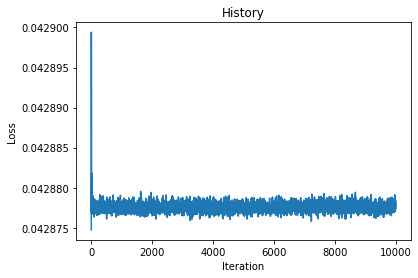

In [308]:
m = LinearRegression(penalty='l1', lr=1e-5, n_iter=10000)
m.fit(X, y, loss_func='mse')
m.plot_history()

In [295]:
from sklearn.linear_model import LinearRegression

In [296]:
m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [297]:
y_pred = m.predict(X)
mse_loss(torch.FloatTensor(y), torch.FloatTensor(y_pred))

tensor(0.0427)

In [298]:
m.coef_

array([-0.03514652, -0.22706729,  0.22063361, -0.06647453,  0.01135318,
       -0.02373945,  0.01949875, -0.01668543,  0.01151324, -0.01240939,
       -0.01682201,  0.00830565,  0.00063337, -0.00562167,  0.0476354 ,
       -0.03424085, -0.02687248,  0.01462965, -0.0072686 , -0.00153087,
        0.18683304, -0.01850012,  0.0026786 , -0.17155393])

In [299]:
m.intercept_

0.09279533893768505